In [38]:
from NuRadioMC.utilities import earth_attenuation
from NuRadioReco.utilities import units
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 300

In [39]:
cosz = np.linspace(-1,1,250)
thetas = np.arccos(cosz)
energies = np.logspace(15,20,11)
energies
flavor = np.full(np.shape(thetas), fill_value=12)

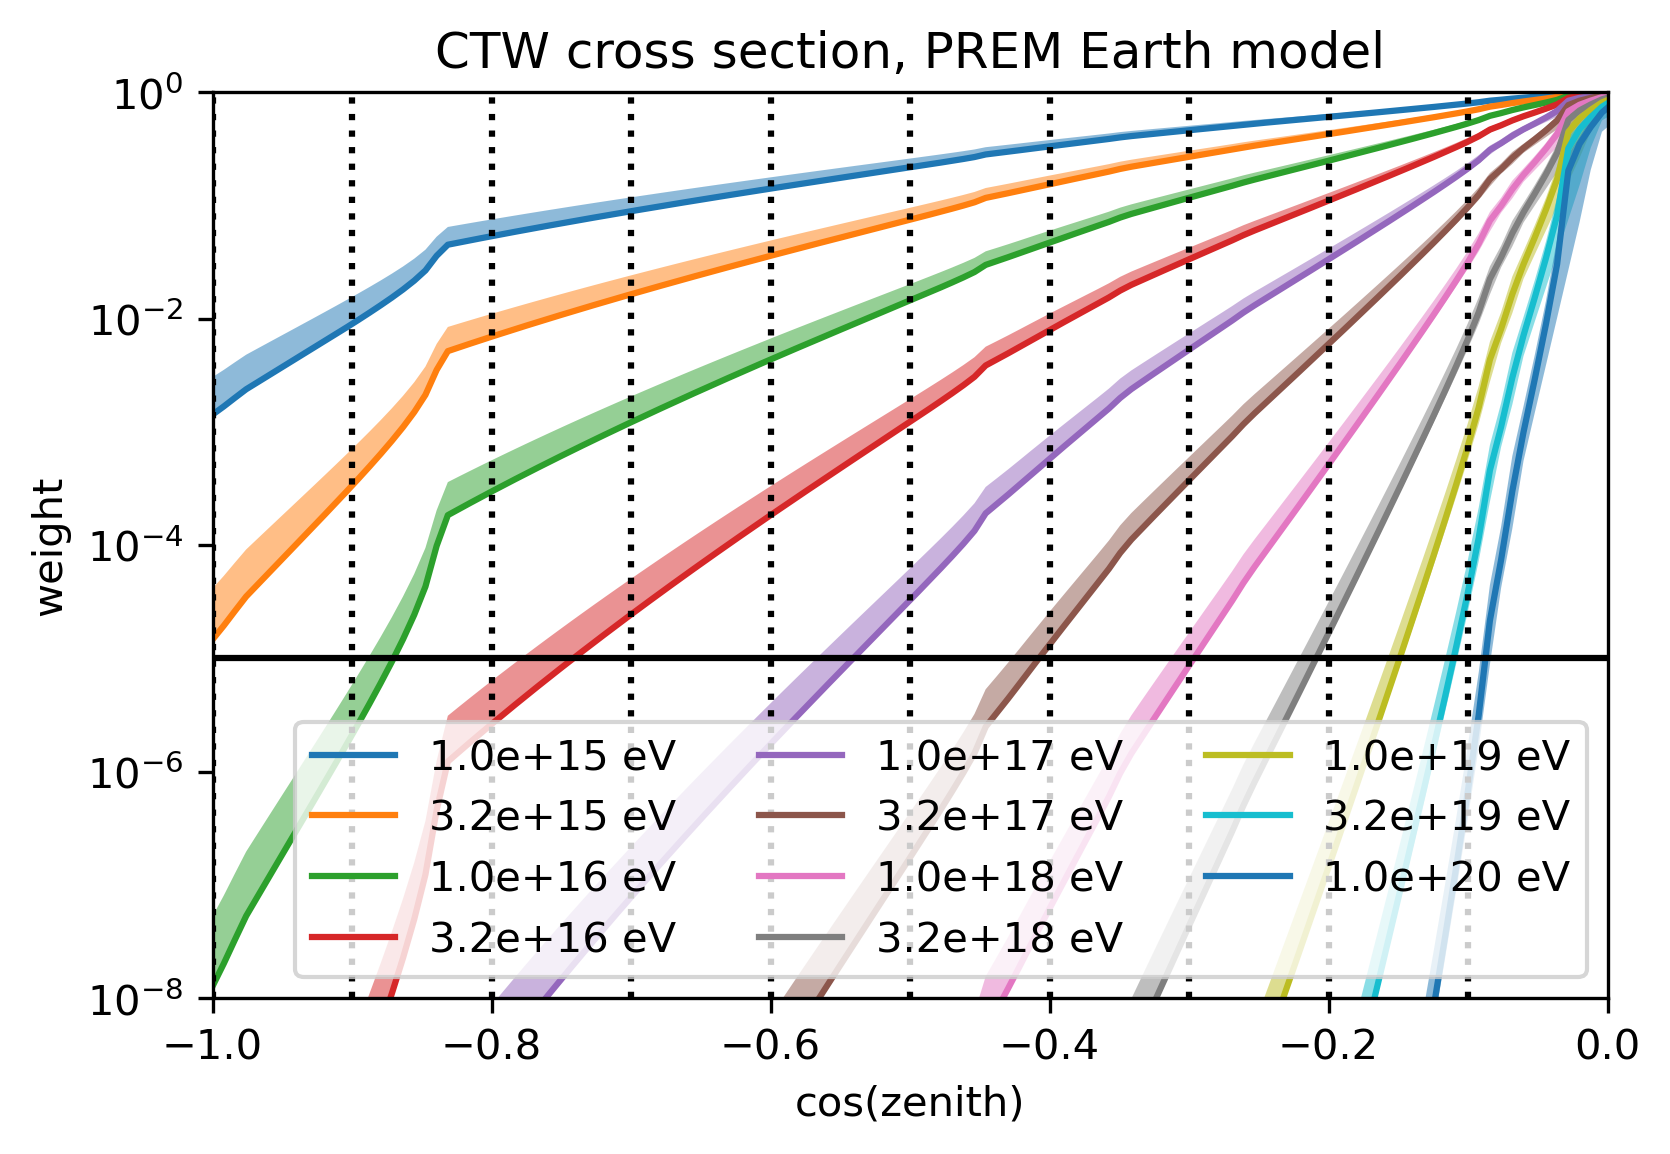

In [40]:
flavors = np.array([-16,-14,-12, 12, 14, 16])
coszmin = []
for E in energies:
    t = []
    w = []
    wmin = []
    wmax = []
    for theta in thetas:
        t.append(np.cos(theta))
        weight = earth_attenuation.get_weight(theta, E, 12,  mode='PREM', cross_section_type='ctw', vertex_position=[0,0,-0.5*units.km], phi_nu=0)
        weights_bottom = np.array([earth_attenuation.get_weight(theta, E, flavor,  mode='PREM', cross_section_type='ctw', vertex_position=[0,0,-2.7*units.km], phi_nu=0) for flavor in flavors]) 
        weights_top = np.array([earth_attenuation.get_weight(theta, E, flavor,  mode='PREM', cross_section_type='ctw', vertex_position=[0,0,0], phi_nu=0)for flavor in flavors])
        min_w = min(np.concatenate([weights_bottom, weights_top]))
        max_w = max(np.concatenate([weights_bottom, weights_top]))
        wmin.append(min_w)
        wmax.append(max_w)
        w.append(weight)
    plt.plot(t, w, label=f"{E:.1e} eV")
    plt.fill_between(t, wmin, wmax, alpha=0.5)
    coszmin.append(np.interp(-5, np.log10(wmax), t))
plt.legend(ncol=3)
plt.semilogy()
plt.ylim(1e-8, 1e0)
plt.xlim(-1,0)
plt.ylabel("weight")
plt.xlabel("cos(zenith)")
plt.title("CTW cross section, PREM Earth model")
plt.axhline(1e-5, color="black")
for x in np.arange(-1,0, 0.1):
    plt.axvline(x, linestyle=":", color="black")
plt.savefig("absorption_weights.png")

In [41]:
coszmin

[-1.0,
 -1.0,
 -0.8885990263665575,
 -0.7789514693898424,
 -0.5671321439591488,
 -0.4271970689561833,
 -0.31298773183922085,
 -0.2211770846405464,
 -0.15755394244969007,
 -0.11630011269507222,
 -0.09106825111640954]

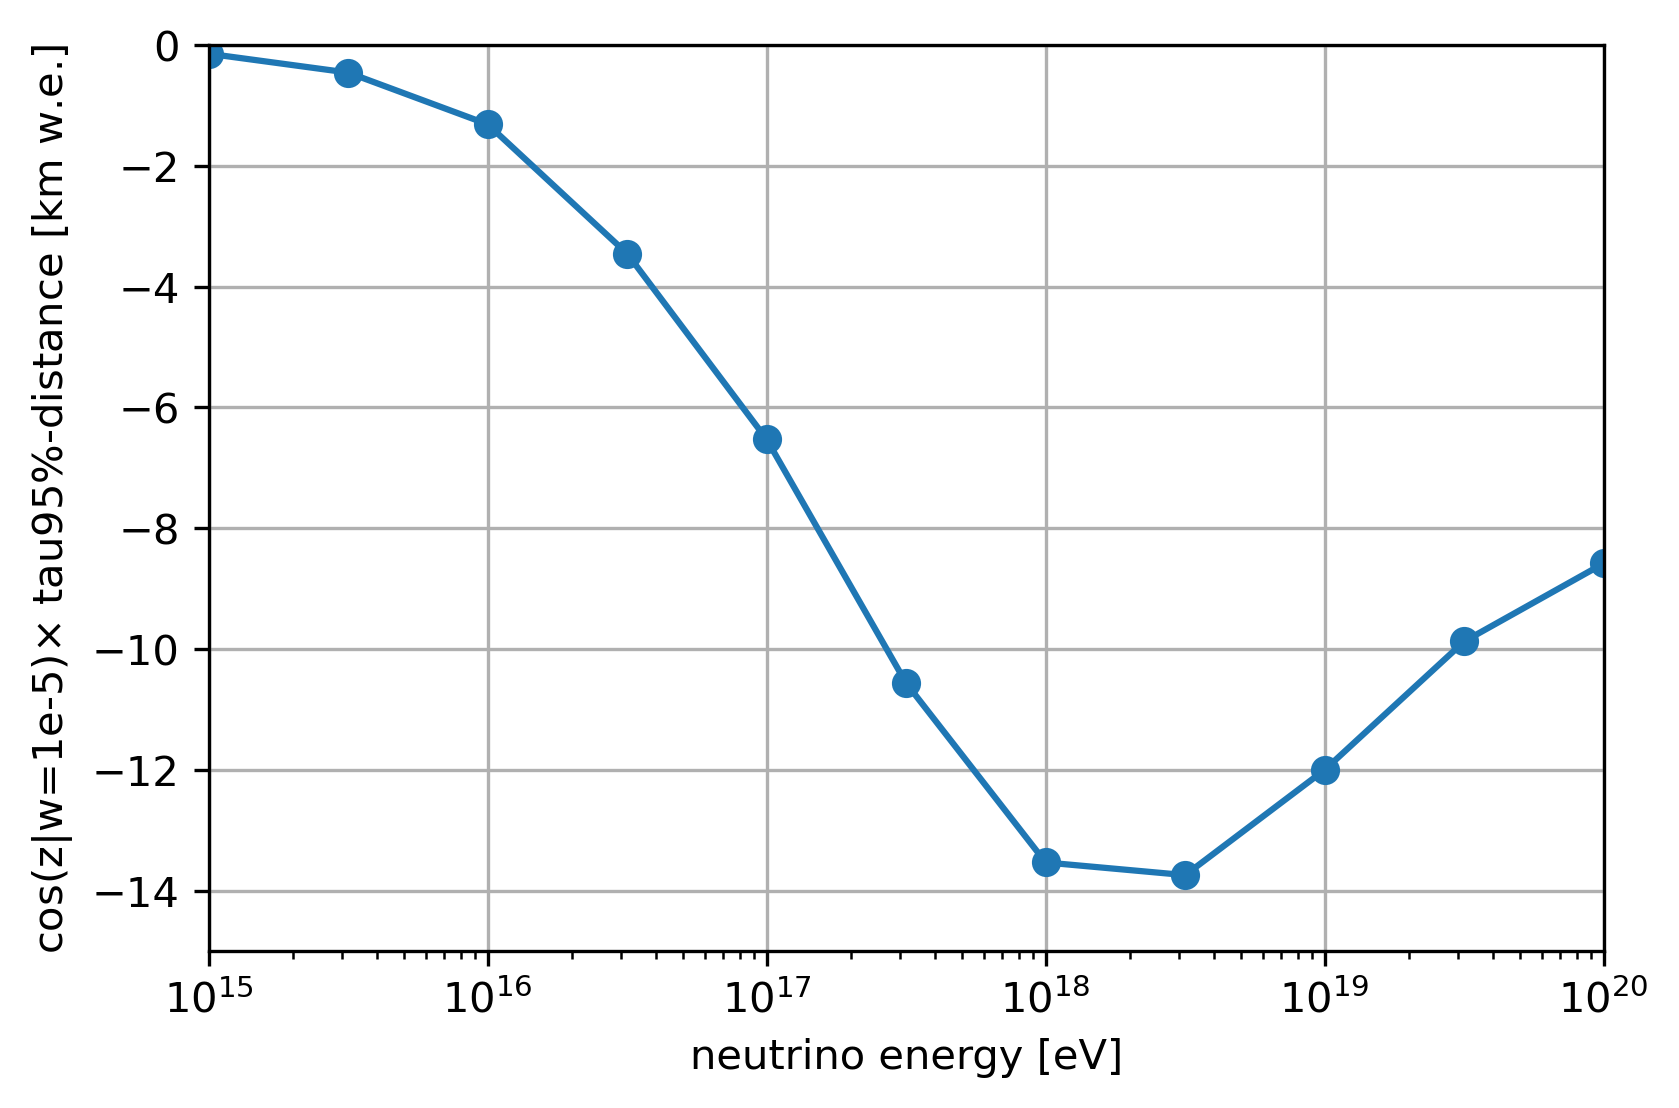

In [42]:
from NuRadioMC.EvtGen import generator
zmins = []
for E, czmin in zip(energies, coszmin):
    tau95 = generator.get_tau_95_length(E)
    #cosz = np.linspace(-1,0,100)
    #zmin = tau95*cosz
    zmin = tau95*czmin
    zmins.append(zmin)
plt.plot(energies, np.array(zmins)/units.km, "o-")
plt.xlabel("neutrino energy [eV]")
plt.ylabel(r"cos(z|w=1e-5)$\times$ tau95%-distance [km w.e.]")
plt.semilogx()
plt.ylim(-15,0)
plt.xlim(energies[0], energies[-1])
plt.grid()
plt.savefig("max_distance_below_rock.png")

In [45]:
np.round(np.array(zmins)/units.km/2.5,1)
zmins

[-143.9248320214382,
 -455.75250179333557,
 -1311.4503669784249,
 -3453.399040267865,
 -6528.639214998724,
 -10565.920753215634,
 -13533.222981911702,
 -13742.545053082942,
 -11999.4247706774,
 -9872.96746358595,
 -8581.697393141962]

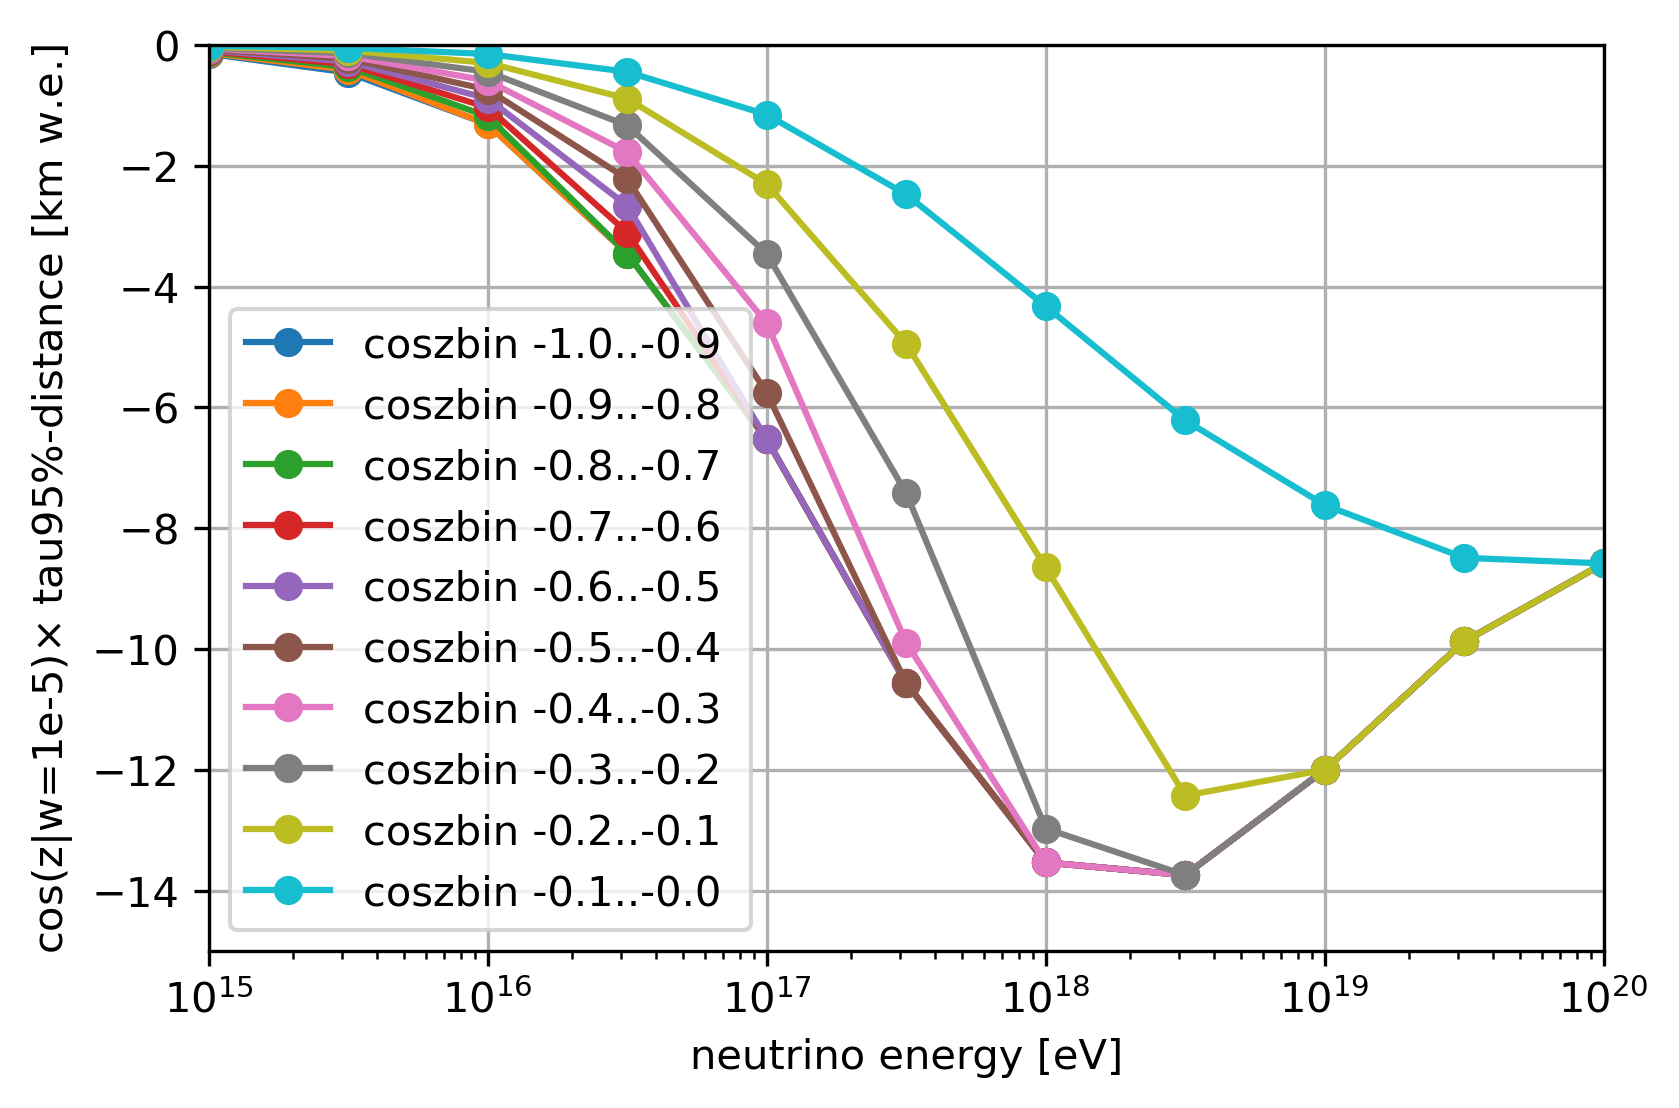

In [69]:
from NuRadioMC.EvtGen import generator

czdict = {}
for cz in np.arange(-1,0,0.1):
    zmins = []
    czdict[np.round(cz, 1)] = {}
    for E, czmin in zip(energies, coszmin):
        tau95 = generator.get_tau_95_length(E)
        #cosz = np.linspace(-1,0,100)
        #zmin = tau95*cosz
        zmin = tau95*max(czmin, cz)
        zmins.append(zmin)
        czdict[np.round(cz, 1)][np.log10(E)] = np.round(np.array(zmin)/2.5/1000,1)
    plt.plot(energies, np.array(zmins)/units.km, "o-", label=f"coszbin {cz:.1f}..{cz+0.1:.1f} ")
plt.legend()
plt.xlabel("neutrino energy [eV]")
plt.ylabel(r"cos(z|w=1e-5)$\times$ tau95%-distance [km w.e.]")
plt.semilogx()
plt.ylim(-15,0)
plt.xlim(energies[0], energies[-1])
plt.grid()
#plt.savefig("max_distance_below_rock.png")
plt.savefig("max_distance_below_rock_coszbins.png")

In [70]:
print(czdict)

{-1.0: {15.0: -0.1, 15.5: -0.2, 16.0: -0.5, 16.5: -1.4, 17.0: -2.6, 17.5: -4.2, 18.0: -5.4, 18.5: -5.5, 19.0: -4.8, 19.5: -3.9, 20.0: -3.4}, -0.9: {15.0: -0.1, 15.5: -0.2, 16.0: -0.5, 16.5: -1.4, 17.0: -2.6, 17.5: -4.2, 18.0: -5.4, 18.5: -5.5, 19.0: -4.8, 19.5: -3.9, 20.0: -3.4}, -0.8: {15.0: -0.0, 15.5: -0.1, 16.0: -0.5, 16.5: -1.4, 17.0: -2.6, 17.5: -4.2, 18.0: -5.4, 18.5: -5.5, 19.0: -4.8, 19.5: -3.9, 20.0: -3.4}, -0.7: {15.0: -0.0, 15.5: -0.1, 16.0: -0.4, 16.5: -1.2, 17.0: -2.6, 17.5: -4.2, 18.0: -5.4, 18.5: -5.5, 19.0: -4.8, 19.5: -3.9, 20.0: -3.4}, -0.6: {15.0: -0.0, 15.5: -0.1, 16.0: -0.4, 16.5: -1.1, 17.0: -2.6, 17.5: -4.2, 18.0: -5.4, 18.5: -5.5, 19.0: -4.8, 19.5: -3.9, 20.0: -3.4}, -0.5: {15.0: -0.0, 15.5: -0.1, 16.0: -0.3, 16.5: -0.9, 17.0: -2.3, 17.5: -4.2, 18.0: -5.4, 18.5: -5.5, 19.0: -4.8, 19.5: -3.9, 20.0: -3.4}, -0.4: {15.0: -0.0, 15.5: -0.1, 16.0: -0.2, 16.5: -0.7, 17.0: -1.8, 17.5: -4.0, 18.0: -5.4, 18.5: -5.5, 19.0: -4.8, 19.5: -3.9, 20.0: -3.4}, -0.3: {15.0: -0.0, 

In [71]:
import pandas as pd

In [82]:
df = pd.DataFrame.from_dict(czdict)
df.T

,15.0,15.5,16.0,16.5,17.0,17.5,18.0,18.5,19.0,19.5,20.0
-1.0,-0.1,-0.2,-0.5,-1.4,-2.6,-4.2,-5.4,-5.5,-4.8,-3.9,-3.4
-0.9,-0.1,-0.2,-0.5,-1.4,-2.6,-4.2,-5.4,-5.5,-4.8,-3.9,-3.4
-0.8,-0.0,-0.1,-0.5,-1.4,-2.6,-4.2,-5.4,-5.5,-4.8,-3.9,-3.4
-0.7,-0.0,-0.1,-0.4,-1.2,-2.6,-4.2,-5.4,-5.5,-4.8,-3.9,-3.4
-0.6,-0.0,-0.1,-0.4,-1.1,-2.6,-4.2,-5.4,-5.5,-4.8,-3.9,-3.4
-0.5,-0.0,-0.1,-0.3,-0.9,-2.3,-4.2,-5.4,-5.5,-4.8,-3.9,-3.4
-0.4,-0.0,-0.1,-0.2,-0.7,-1.8,-4.0,-5.4,-5.5,-4.8,-3.9,-3.4
-0.3,-0.0,-0.1,-0.2,-0.5,-1.4,-3.0,-5.2,-5.5,-4.8,-3.9,-3.4
-0.2,-0.0,-0.0,-0.1,-0.4,-0.9,-2.0,-3.5,-5.0,-4.8,-3.9,-3.4
-0.1,-0.0,-0.0,-0.1,-0.2,-0.5,-1.0,-1.7,-2.5,-3.0,-3.4,-3.4


In [81]:
df.T.to_dict()

{15.0: {-1.0: -0.1,
  -0.9: -0.1,
  -0.8: -0.0,
  -0.7: -0.0,
  -0.6: -0.0,
  -0.5: -0.0,
  -0.4: -0.0,
  -0.3: -0.0,
  -0.2: -0.0,
  -0.1: -0.0},
 15.5: {-1.0: -0.2,
  -0.9: -0.2,
  -0.8: -0.1,
  -0.7: -0.1,
  -0.6: -0.1,
  -0.5: -0.1,
  -0.4: -0.1,
  -0.3: -0.1,
  -0.2: -0.0,
  -0.1: -0.0},
 16.0: {-1.0: -0.5,
  -0.9: -0.5,
  -0.8: -0.5,
  -0.7: -0.4,
  -0.6: -0.4,
  -0.5: -0.3,
  -0.4: -0.2,
  -0.3: -0.2,
  -0.2: -0.1,
  -0.1: -0.1},
 16.5: {-1.0: -1.4,
  -0.9: -1.4,
  -0.8: -1.4,
  -0.7: -1.2,
  -0.6: -1.1,
  -0.5: -0.9,
  -0.4: -0.7,
  -0.3: -0.5,
  -0.2: -0.4,
  -0.1: -0.2},
 17.0: {-1.0: -2.6,
  -0.9: -2.6,
  -0.8: -2.6,
  -0.7: -2.6,
  -0.6: -2.6,
  -0.5: -2.3,
  -0.4: -1.8,
  -0.3: -1.4,
  -0.2: -0.9,
  -0.1: -0.5},
 17.5: {-1.0: -4.2,
  -0.9: -4.2,
  -0.8: -4.2,
  -0.7: -4.2,
  -0.6: -4.2,
  -0.5: -4.2,
  -0.4: -4.0,
  -0.3: -3.0,
  -0.2: -2.0,
  -0.1: -1.0},
 18.0: {-1.0: -5.4,
  -0.9: -5.4,
  -0.8: -5.4,
  -0.7: -5.4,
  -0.6: -5.4,
  -0.5: -5.4,
  -0.4: -5.4,
  -0.3: -5.2,
